In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from utils.source import DataSource
from utils.transform import DropNa, LogDiff
from utils.hurst import hurst_exponent
import nolds

Import asset data from Yahoo.

In [6]:
asset = ['BTC-USD', 'ETH-USD', '^GSPC', 'EURUSD=X', 'SI=F', 'ACAEUO.MI',
        'ACAPER.MI', 'ACABRT.MI', 'XMLC.F', 'XDW0.DE', 'BRK-A', '7309.T', 'AIGI.MI', 
         'WEAT.MI']
data = DropNa().apply(DataSource().get_data(asset))
#data = pd.read_csv('asset-crashes.csv')
#data['Date'] = data['Date'].astype('datetime64')
#data = data.set_index('Date')
data.head()

,7309.T,ACABRT.MI,ACAEUO.MI,ACAPER.MI,AIGI.MI,BRK-A,BTC-USD,ETH-USD,EURUSD=X,SI=F,WEAT.MI,XDW0.DE,XMLC.F,^GSPC
Date,,,,,,,,,,,,,,
2019-09-10,15228.157227,16.441000,19.694000,23.871000,10.568,311950.0,10115.975586,179.787170,1.105033,18.041000,0.5140,27.945000,9.026,2979.389893
2019-09-11,15441.139648,16.468000,19.719000,23.972000,10.650,316230.0,10178.372070,178.725494,1.101346,18.031000,0.5168,27.975000,9.214,3000.929932
2019-09-12,15770.291016,16.539000,19.826000,24.226000,10.650,317182.0,10410.126953,181.016098,1.105828,18.041000,0.5164,27.549999,9.291,3009.570068
2019-09-17,15721.886719,16.523001,19.801001,24.017000,10.404,315744.0,10241.272461,208.608749,1.107469,18.016001,0.5189,28.430000,9.295,3005.699951
2019-09-18,15673.480469,16.528999,19.815001,24.089001,10.404,317030.0,10198.248047,211.393036,1.103144,17.795000,0.5255,28.230000,9.280,3006.729980


<AxesSubplot: xlabel='Date'>

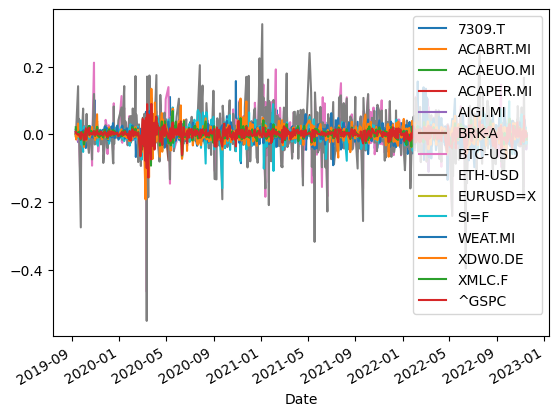

In [7]:
log_returns = LogDiff().apply(data)
log_returns.plot()

In [12]:
hurst_methods = [
    log_returns.apply(lambda x: hurst_exponent(x, method='DSOD')),
    log_returns.apply(lambda x: hurst_exponent(x, method='RS')),
    log_returns.apply(lambda x: hurst_exponent(x, method='DMA')),
    log_returns.apply(lambda x: nolds.hurst_rs(x)),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.binary_n(10000))),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.logarithmic_n(1, 100, 10)))
]
hurst_table_log = pd.concat(hurst_methods, axis=1)
hurst_table_log.columns = ['DSOD', 'RS', 'DMA', 'nolds.rs']#, "nolds.rs.binary_n", "nolds.rs.log_n"]
hurst_table_log

,DSOD,RS,DMA,nolds.rs
BTC-USD,-0.104613,0.315006,0.016323,0.478324
ETH-USD,-0.109055,0.332960,0.013439,0.521047
^GSPC,-0.363950,0.260236,0.011975,0.497143
EURUSD=X,-0.047385,0.264806,0.014209,0.530939
SI=F,-0.011332,0.298728,0.011775,0.503133
ACAEUO.MI,0.057030,0.353118,0.022808,0.681398
ACAPER.MI,-0.027218,0.357333,0.016233,0.654842
ACABRT.MI,0.007672,0.353183,0.022713,0.680219
XMLC.F,-0.001009,0.231166,0.012426,0.524379
XDW0.DE,0.076835,0.303282,0.013777,0.553010


In [13]:
hurst_table_log['nolds.rs'].sort_values()

7309.T       0.461749
BTC-USD      0.478324
^GSPC        0.497143
SI=F         0.503133
ETH-USD      0.521047
XMLC.F       0.524379
EURUSD=X     0.530939
BRK-A        0.532650
XDW0.DE      0.553010
AIGI.MI      0.556110
WEAT.MI      0.568057
ACAPER.MI    0.654842
ACABRT.MI    0.680219
ACAEUO.MI    0.681398
Name: nolds.rs, dtype: float64